# Ensemble

### 1. Introdução a ensemble

#### 1.1. O que é Ensemble Learning
Os modelos de Machine Learning são muito diversos, cada um com pontos fortes e fracos. Fazendo uma analogia, podemos ter um modelo que é uma lança, boa para ataque a distância, mas péssimo para defesa, e um modelo que é um escudo, ótimo para defesa, mas péssimo para ataque. Assim, surgiu a consagrada combinação do uso de lança e escudo ao mesmo tempo, em que os pontos fracos de um são amenizados pelo outro para criar uma ótima combinação. Aplicando essa analogia para Machine Learning, o que aconteceria se combinássemos diversos modelos para criar um só resultado?
<div align="center">
    <img src="https://rukminim2.flixcart.com/image/480/640/j87njww0/poster/y/r/t/large-movie-300-spartan-warrior-spear-helm-shield-historical-original-imaesuuqepzzeuuy.jpeg?q=20" width="500">
</div>

###### https://play-lh.googleusercontent.com/proxy/ioHCuEzTOGqBffVSG-ChlM54kuPZztigSprDZnPJ0xVFxqacs7lkzbIjFdfyMkxJV_kHGhA1Z8XVphnT6kDNiAYmOh1Vxgaw1zh1wdow4tgW6ntZxeNE=s1920-w1920-h1080

O Ensemble Learning nasce justamente dessa ideia, combinando diversos modelos para criar um resultado único para o target.  Porém, também pode ser usado ao mudar os parâmetros de um mesmo modelo. O sklearn possui alguns métodos interessantes para essa ideia. Veremos alguns deles a seguir.

##### 1.2.1 Voting Classifier
O Voting Classifier é um módulo do sklearn que permite o uso de Ensemble Learning para modelos de classificação (atributo target é um rótulo). Ele pode ser de dois tipos, Hard ou Soft, que serão melhor detalhados mais a frente. Os parâmetros recebidos são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

voting - 'hard' ou 'soft'. default='hard'

weights - array com peso dado a cada modelo. default='None'

n_jobs - int com quantos modelos processar ao mesmo tempo. Usar -1 significa todos os processadores. default=1

flatten_transform - Para True (default), a função retorna uma matriz 2D de número de linhas o número de amostras e número de colunas o número de classes do target * número de modelos. Para cada linha e coluna são retornados as probabilidades obtidas da classe para o modelo para a amostra. Para False, é retornada uma matriz 3D com (n_modelos, n_amostras, n_classes), sendo mais fácil de visualizar.

verbose - printa o tempo gasto em cada modelo. default = False

##### 1.2.2 Voting Hard
O Voting Hard é o mais simples, basicamente calculando a moda dentre o resultado de todos os modelos. Por exemplo, se o primeiro classificou como cachorro, o segundo como gato e o terceiro como cachorro, retornará cachorro.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*djKLooxyOLvr98oMi5uwgA.jpeg" width="500">
</div>

###### https://miro.medium.com/v2/resize:fit:1400/1*djKLooxyOLvr98oMi5uwgA.jpeg

##### 1.2.3 Voting Soft
O Voting Soft, para cada modelo, pega a probabilidade de cada classificação de target e calcula a probabilidade da classificação na média dos modelos. Ex.: Probabilidades (cachorro, gato), modelo 1 (60%, 40%) modelo 2 (10%, 90%), modelo 3 (70%, 30%). O modelo soft calcula ((60+10+70)/3, (40+90+30)/3) = (46.7, 53.3) retornando então gato. Veja que para o mesmo caso o hard retornaria cachorro, enquanto o soft retorna gato, sendo um caso muito interessante.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:958/1*jWDS7vyoVmp3__sPALq64g.png" width="300">
</div>

###### https://miro.medium.com/v2/resize:fit:958/1*jWDS7vyoVmp3__sPALq64g.png

A parte intrigante do Voting Soft é que os modelos do SKLearn não retornam explicitamente probabilidades, porém existe um método ".predict_proba()" que faz esse cálculo de probabilidade do modelo, então o voting classifier usa esse módulo automaticamente nos modelos passados a ele. Isso é também um dos problemas do soft, pois nem todos os modelos tem o módulo de probabilidade, dando raise error. Porém continuaria funcionando normalmente para voting hard.

Um exemplo do cálculo de ".predict_proba()" é no KNN. Para os n vizinhos mais próximos, a probabilidade de cada classe é o número de ocorrências de cada classe dividido por n. Exemplo, um sistema binário com 5 vizinhos mais próximos 1,0,1,1,0 terá probabilidade de 1 igual a 3/5 e probabilidade de 0 igual a 2/5.

##### 1.2.4 Hard x Soft
A diferença entre os dois é que o hard é mais simples e mais rápido, enquanto o soft é mais lento, porém pode alcançar acurácia maior. O voting classifier, por usar muitos modelos, é computacionalmente pesado, fazendo do voting hard uma boa alternativa para muitos casos, mesmo tendo acurácia muitas vezes menor.

#### 1.3 Stacking Classifier
O Stacking Classifier começa de forma análoga ao Voting Classifier, usa vários modelos para treinar e receber o resultado de cada um deles. Porém, após isso, o Stacking Classifier usa um novo modelo que é treinado com os outputs de cada modelo para selecionar o melhor resultado de target.
<div align="center">
    <img src="https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png" width="500">
</div>

###### https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png

Os parâmetros do Stacking Classifier são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

final_estimator - seleciona o modelo que será usado para o treino a partir dos dados preditos. LogisticRegression é o default.

cv - cross-validation, para o treinamento final, dividindo os dados em selecionadas partes. default=5.


#### 1.4 Voting Regressor
O Voting Regressor funciona de forma semelhante ao Voting Classifier. Ele treina alguns modelos e calcula ao final a média ponderada dos resultados.
<div align="center">
    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CyAktm2zC6ua2MSlCgGiIg.jpeg" width="600">
</div>

###### https://miro.medium.com/v2/resize:fit:1400/1*CyAktm2zC6ua2MSlCgGiIg.jpeg

Os parâmetros recebidos são:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

weights - um array com os pesos em int ou float de cada modelo na sequência. O default é a média atitmética.

n_jobs - int com quantos modelos processar ao mesmo tempo. Usar -1 significa todos os processadores. default=1

verbose - printa o tempo gasto em cada modelo. default = False

#### 1.5 Stacking Regressor
Também segue a mesma ideia que o Stacking Classifier, recebendo o output dos diversos modelos e com eles treinando um novo para o resultado final.
<div align="center">
    <img src="https://carpentries-incubator.github.io/machine-learning-novice-sklearn/fig/stacking.jpeg" width="600">
</div>

###### https://carpentries-incubator.github.io/machine-learning-novice-sklearn/fig/stacking.jpeg

Ele recebe como parâmetros:

estimators - recebe um array com tuplas de uma str para o nome e um modelo. Ex.: [('KNN', KNeighborsClassifier())]

final_estimator - seleciona o modelo que será usado para o treino a partir dos dados preditos. RidgeCV é o default.

cv - cross-validation, para o treinamento final, dividindo os dados em selecionadas partes. default=5.

### 2. Treino de modelo

In [2]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('../dataset_processing/xtb_dataset.csv')
df

,Dipole,E_HOMO,E_LUMO,gap_HOMO-LUMO,ZPE,H,U,U0,G,Delta
0,0.727,-10.6203,-2.7950,-7.8253,0.154214,-27.917739,-27.918683,-28.080950,-27.959630,-12.397982
1,1.905,-10.4336,-2.2949,-8.1387,0.199866,-28.104404,-28.105348,-28.313524,-28.146070,-12.165407
2,4.475,-10.5746,-6.9494,-3.6252,0.120064,-27.272560,-27.273504,-27.400818,-27.312535,-13.078113
3,2.100,-9.8173,-5.5314,-4.2859,0.177677,-27.068399,-27.069343,-27.254803,-27.108720,-13.224129
4,0.872,-9.9722,-6.6172,-3.3550,0.133244,-24.148876,-24.149821,-24.292155,-24.192788,-16.186776
...,...,...,...,...,...,...,...,...,...,...
129152,4.710,-11.3840,-7.8335,-3.5505,0.121817,-26.808903,-26.809847,-26.939965,-26.851229,-13.538966
129153,4.996,-10.8793,-7.1097,-3.7696,0.141742,-28.278349,-28.279293,-28.428099,-28.317523,-12.050832
129154,3.973,-10.9497,-7.7346,-3.2151,0.124894,-24.819326,-24.820270,-24.952019,-24.858199,-15.526912
129155,0.918,-10.2869,-1.8611,-8.4258,0.195977,-30.002576,-30.003520,-30.208931,-30.047056,-10.270000


In [4]:
X = df.drop("Delta", axis=1)
y = df["Delta"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=27)

In [1]:
en = ElasticNet(alpha=0.00006820706258709369,
                   l1_ratio=0.17332460629146462, 
                   fit_intercept=True, 
                   positive=False,
                   max_iter=33778,
                   tol=8.423671561653807e-7,
                   selection='random')

xgb = XGBRegressor(booster="gbtree", 
                     colsample_bylevel=0.7444692303677609, 
                     colsample_bynode=0.94070330903296,
                     colsample_bytree=0.8576468748597981,
                     gamma=0.0000029265344647141457,
                     grow_policy="lossguide",
                     learning_rate=0.17248401306681566,
                     max_delta_step=10,
                     max_leaves=653,
                     min_child_weight=0.013131713175532052,
                     n_estimators=1284,
                     reg_alpha=0.04646885526155054,
                     reg_lambda=7.634253975485113,
                     subsample=0.6768760639340133)

# Modelo SVR com os melhores parâmetros
svr_model = SVR(
    kernel='linear',
    C=23.069035874199496,
    epsilon=0.01005448848886116
)

# Sequential Feature Selector com os mesmos parâmetros
sfs = SequentialFeatureSelector(
    estimator=SVR(
        kernel='linear',
        C=23.069035874199496,
        epsilon=0.01005448848886116
    ),
    n_features_to_select=3,
    direction='backward'  # sfs_forward=False -> backward
)

# Pipeline completo
pipe_final = Pipeline([
    ("normalizador", StandardScaler()),  # usar_std=True
    ("seletor", sfs),
    ("estimator", svr_model)
])

# Modelo Kernel Ridge com os melhores parâmetros
krr_model = KernelRidge(
    kernel='poly',
    gamma=4.417659195729214,
    alpha=0.15205393395994812,
    coef0=4.379906035822025,
    degree=3
)

# Sequential Feature Selector com os mesmos parâmetros
sfs = SequentialFeatureSelector(
    estimator=KernelRidge(
        kernel='poly',
        gamma=4.417659195729214,
        alpha=0.15205393395994812,
        coef0=4.379906035822025,
        degree=3
    ),
    n_features_to_select=3,
    direction='forward'  # sfs_forward=True -> forward
)

# Pipeline completo
pipe_final = Pipeline([
    ("normalizador", StandardScaler()),  # Normalização opcional
    ("seletor", sfs),
    ("estimator", krr_model)
])

# -------------------------
# 1Adaptando VIFSelector para funcionar com arrays
# -------------------------
class VIFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=10.0):
        self.threshold = threshold
        self.features_ = None

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        X_work = X.copy()
        dropped = True
        while dropped:
            dropped = False
            vif = [variance_inflation_factor(X_work.values, i) for i in range(X_work.shape[1])]
            max_vif = max(vif)
            if max_vif > self.threshold:
                maxloc = vif.index(max_vif)
                X_work = X_work.drop(X_work.columns[maxloc], axis=1)
                dropped = True
        self.features_ = X_work.columns.tolist()
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        # retorna apenas valores, DataFrame reconstruído depois
        return X[self.features_].values
    
base_learner = DecisionTreeRegressor(
    max_depth=8,
    min_samples_split=8,
    min_samples_leaf=9,
    random_state=88
)
pipe = Pipeline(steps=[
    ('var', VarianceThreshold(threshold=0.0)),
    ('vif', VIFSelector(threshold=10.0)),
    ('scale', StandardScaler()),
    ('selector', RFE(LinearRegression(),n_features_to_select=8)),
    ('regressor', NGBRegressor(
        n_estimators=8,
        learning_rate=0.03129684669118429,
        minibatch_frac=0.8048065146892247,
        col_sample=0.9324907881783285
    ))
])

NameError: name 'ElasticNet' is not defined

In [6]:
modelos = []
models=[('EN', en), ('XGB', xgb)]

#Fazer todas as combinações de modelos possíveis
list(itertools.combinations(models, 1))
for i in range(1, len(models) + 1):
    comb = list(itertools.combinations(models, i))
    for item in comb:
        modelos.append(list(item))  # Sempre converter para lista

In [7]:
modelos_us, modelos_sc, Stack_name = [], [], []

for k in modelos:
    strings = [name for name, _ in k]
    modelos_us.append(' e '.join(strings))

    vr = VotingRegressor(estimators=k, n_jobs=-1)
    vr.fit(X_train, y_train)

    y_pred = vr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    modelos_sc.append(rmse)
    Stack_name.append('NA')

In [ ]:
final_estimator = [
    ("RF", RandomForestRegressor(
        random_state=27,
        n_estimators=100,
        max_depth=5
    )),
    ("XGB", XGBRegressor(
        random_state=27,
        n_estimators=100
    )),
    ("LR", LinearRegression()),
    ("SVR", SVR(kernel='rbf'))
]
for final_name, final_est in final_estimator:
    for k in modelos:
        stacking_regressor = StackingRegressor(
            estimators=k,
            final_estimator=final_est,
            cv=5
        )
        stacking_regressor.fit(X_train, y_train)
        y_pred = stacking_regressor.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        modelos_sc.append(rmse)
        strings = [name for name, _ in k]
        modelos_us.append(' e '.join(strings))
        Stack_name.append(final_name)

C:\Users\matheus25022\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.049e-01, tolerance: 4.984e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\matheus25022\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.033e-01, tolerance: 3.946e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\matheus25022\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

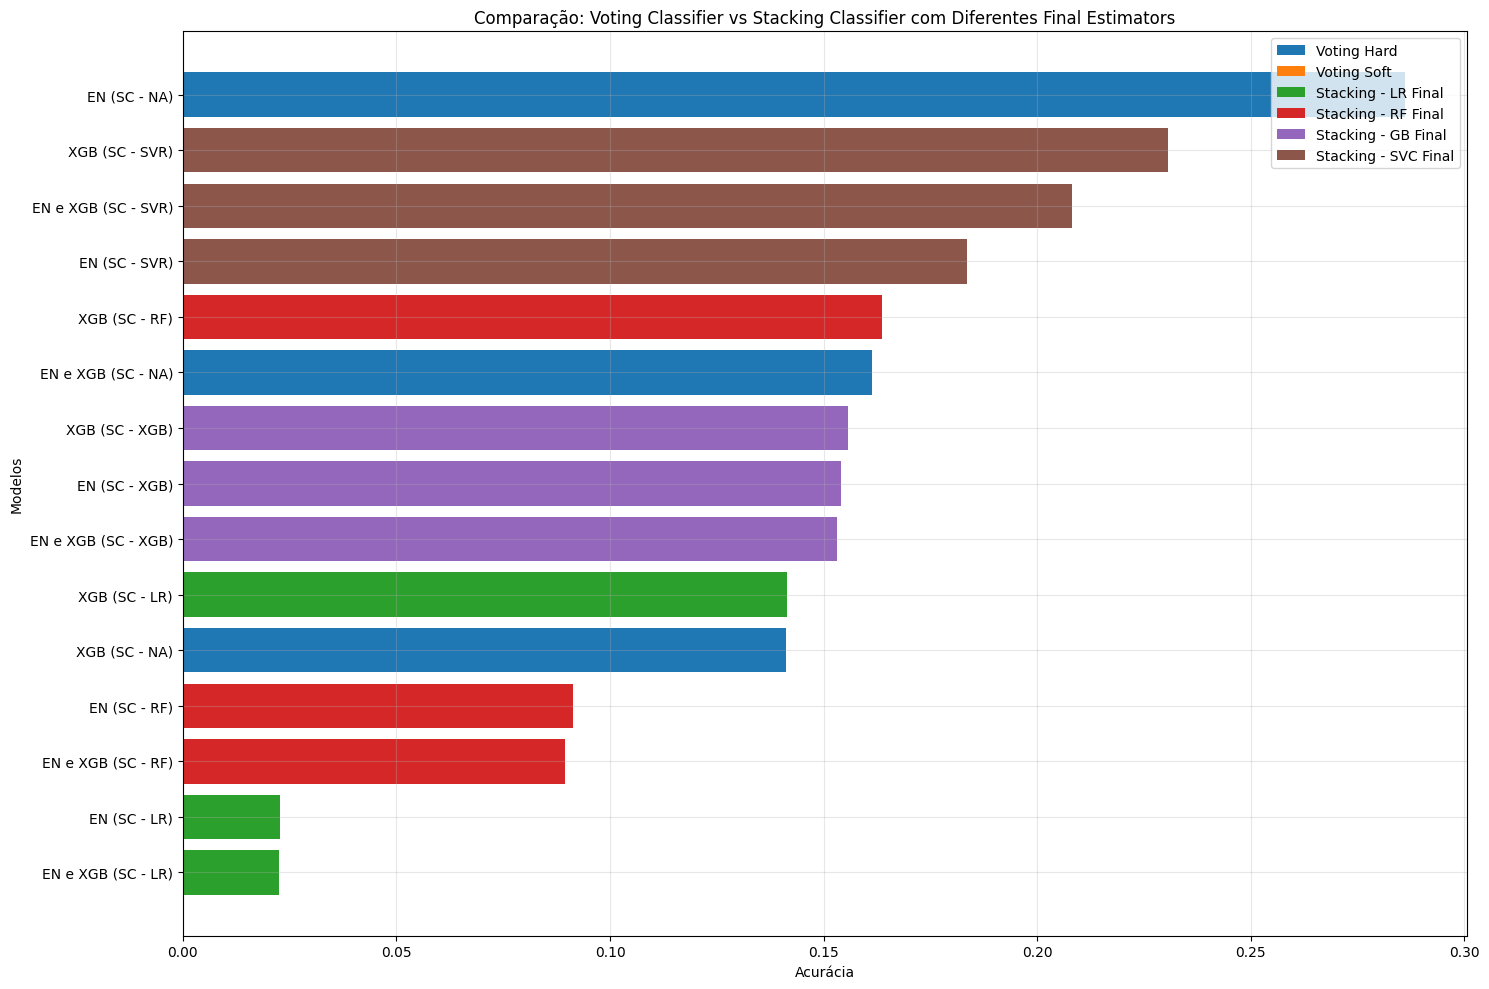

In [ ]:
modelos_us_combinado = [f"{nome} (SC - {final})" for nome, final in zip(modelos_us, Stack_name)]

modelos_sc_arr = np.array(modelos_sc)
modelos_us_arr = np.array(modelos_us_combinado)

indices_ordenados = np.argsort(modelos_sc_arr)
modelos_us_ord = modelos_us_arr[indices_ordenados]
modelos_sc_ord = modelos_sc_arr[indices_ordenados]

plt.figure(figsize=(15, 10))
colors = []
for n in modelos_us_ord:
    if '(SC - NA)' in n:
        colors.append('tab:blue')
    elif '(SC - LR)' in n:
        colors.append('tab:green')
    elif '(SC - RF)' in n:
        colors.append('tab:red')
    elif '(SC - XGB)' in n:
        colors.append('tab:purple')
    elif '(SC - SVR)' in n:
        colors.append('tab:brown')
    else:
        colors.append('tab:gray')

plt.barh(modelos_us_ord, modelos_sc_ord, color=colors)
plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Comparação: Voting Classifier vs Stacking Classifier com Diferentes Final Estimators')
plt.tight_layout()
plt.grid(True, alpha=0.3)
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='tab:blue', label='Voting Hard'),
    Patch(facecolor='tab:orange', label='Voting Soft'),
    Patch(facecolor='tab:green', label='Stacking - LR Final'),
    Patch(facecolor='tab:red', label='Stacking - RF Final'),
    Patch(facecolor='tab:purple', label='Stacking - GB Final'),
    Patch(facecolor='tab:brown', label='Stacking - SVC Final')
]
plt.legend(handles=legend_elements, loc='upper right')
plt.show()

### 3. Discussão

### 4. Referências

SCIKIT-LEARN. VotingClassifier. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html. Acesso em: 6 out. 2025.

BIN SALIH, Ilyas. What is hard and soft voting in machine learning. 2025. Disponível em: https://ilyasbinsalih.medium.com/what-is-hard-and-soft-voting-in-machine-learning-2652676b6a32. Acesso em: 6 out. 2025.

DATA AND BEYOND. Voting classifier hard and soft in scikit-learn. 2025. Disponível em: https://medium.com/data-and-beyond/voting-classifier-hard-and-soft-in-scikit-learn-d2f3c091d973. Acesso em: 6 out. 2025.

F2ACODE. Comitê de classificadores: classificação multiclasse e multirrótulo. 2025. Disponível em: https://medium.com/@f2acode/comitê-de-classificadores-classificação-multiclasse-e-multirrótulo-7a01d87ee9b8. Acesso em: 6 out. 2025.

SALUNKE, Mangesh. Introduction to ensemble learning. 2025. Disponível em: https://medium.com/@mangeshsalunke1309/introduction-to-ensemble-learning-5641be2eeb26. Acesso em: 6 out. 2025.

ChatGPT. https://chatgpt.com/share/68e44d57-fe44-8011-95ee-97d2c4496a32. Acesso em: 6 out. 2025.

SCIKIT-LEARN. GradientBoostingClassifier (Version 0.15). 2014. Disponível em: https://scikit-learn.org/0.15/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. Decision Trees. 2025. Disponível em: https://scikit-learn.org/stable/modules/tree.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. GaussianNB. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html. Acesso em: 6 out. 2025.

RUTECKI, Marcin. Stacking Classifier Ensemble for Great Results. 2025. Disponível em: https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models. Acesso em: 6 out. 2025.

SARAVANAN, Sharma. Understanding Stacking Classifiers: A Comprehensive Guide. 2025. Disponível em: https://sharmasaravanan.medium.com/understanding-stacking-classifiers-a-comprehensive-guide-195bfab58e48. Acesso em: 6 out. 2025.

SCIKIT-LEARN. StackingClassifier. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html. Acesso em: 6 out. 2025.

MLXTEND. StackingClassifier. 2025. Disponível em: https://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier. Acesso em: 6 out. 2025.

DATA AND BEYOND. Voting Regressor: Intuition and Implementation. 2025. Disponível em: https://medium.com/data-and-beyond/voting-regressor-intuition-and-implementation-0359771b5204. Acesso em: 6 out. 2025.

SCIKIT-LEARN. StackingRegressor. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html. Acesso em: 6 out. 2025.

SCIKIT-LEARN. VotingRegressor. 2025. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html. Acesso em: 6 out. 2025.

DeepSeek. https://chat.deepseek.com/share/q0kxwoy6syuav91w4e. Acesso em: 6 out. 2025.

R.Caliskan. Disamonds. 2025. Disponível em: https://www.kaggle.com/datasets/resulcaliskan/diamonds. Acesso em: 6 out. 2025.

Silveira Matheus. Modelos 7. Acesso em: 3 de out. 2025